# Health Insurance Cross Sell Prediction

Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

Variable	Definition
* id	Unique ID for the customer
* Gender	Gender of the customer
* Age	Age of the customer
* Driving_License	0 : Customer does not have DL, 1 : Customer already has DL
* Region_Code	Unique code for the region of the customer
* Previously_Insured	1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance
* Vehicle_Age	Age of the Vehicle
* Vehicle_Damage	1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.
* Annual_Premium	The amount customer needs to pay as premium in the year
* Policy_Sales_Channel	Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.
* Vintage	Number of Days, Customer has been associated with the company
* Response	1 : Customer is interested, 0 : Customer is not interested

In [1]:
# Importing Tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Import data
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
train_df.head().T

,0,1,2,3,4
id,1,2,3,4,5
Gender,Male,Male,Male,Male,Female
Age,44,76,47,21,29
Driving_License,1,1,1,1,1
Region_Code,28.0,3.0,28.0,11.0,41.0
Previously_Insured,0,0,0,1,1
Vehicle_Age,> 2 Years,1-2 Year,> 2 Years,< 1 Year,< 1 Year
Vehicle_Damage,Yes,No,Yes,No,No
Annual_Premium,40454.0,33536.0,38294.0,28619.0,27496.0
Policy_Sales_Channel,26.0,26.0,26.0,152.0,152.0


In [3]:
test_df.head().T

,0,1,2,3,4
id,381110,381111,381112,381113,381114
Gender,Male,Male,Male,Male,Male
Age,25,40,47,24,27
Driving_License,1,1,1,1,1
Region_Code,11.0,28.0,28.0,27.0,28.0
Previously_Insured,1,0,0,1,1
Vehicle_Age,< 1 Year,1-2 Year,1-2 Year,< 1 Year,< 1 Year
Vehicle_Damage,No,Yes,Yes,Yes,No
Annual_Premium,35786.0,33762.0,40050.0,37356.0,59097.0
Policy_Sales_Channel,152.0,7.0,124.0,152.0,152.0


In [4]:
# Exploration the data
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [5]:
train_df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [6]:
# Is there any duplicate value
train_df.duplicated().sum()

0

In [7]:
# Is there any missing value
train_df.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [8]:
# Check unique value of objects columns 
for col in train_df.columns:
    if train_df[col].dtypes=='object':
        print(col, train_df[col].unique())
        

Gender ['Male' 'Female']
Vehicle_Age ['> 2 Years' '1-2 Year' '< 1 Year']
Vehicle_Damage ['Yes' 'No']


* We have not any missing value
* We have not any duplicated row
* We have 3 columns object type. Later we convert this columns numeric value
* Now, we are ready to data vizualization.

### Data Visualization

Male      206089
Female    175020
Name: Gender, dtype: int64

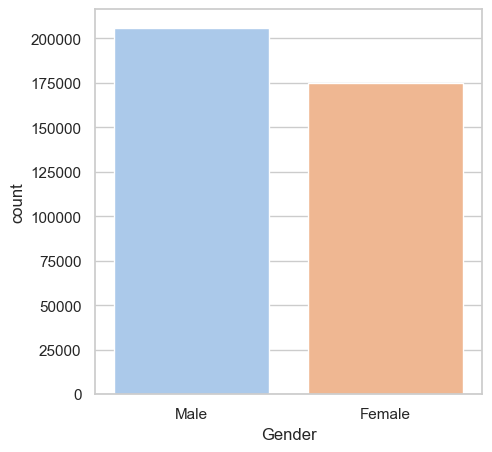

In [9]:
sns.set_theme(style='whitegrid', palette='pastel')
plt.figure(figsize=(5,5))
sns.countplot(data=train_df, x='Gender');
train_df.Gender.value_counts()

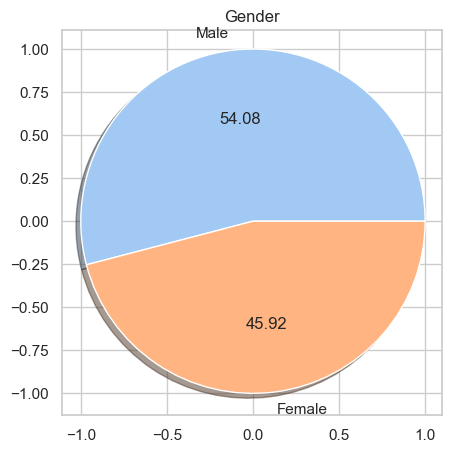

In [10]:
plt.figure(figsize=(5,5))
plt.pie(train_df['Gender'].value_counts(), labels=train_df['Gender'].value_counts().index,autopct='%.2f', shadow=True, frame=True )
plt.title('Gender')
plt.show();

* Male and female numbers are balanced.

1    380297
0       812
Name: Driving_License, dtype: int64

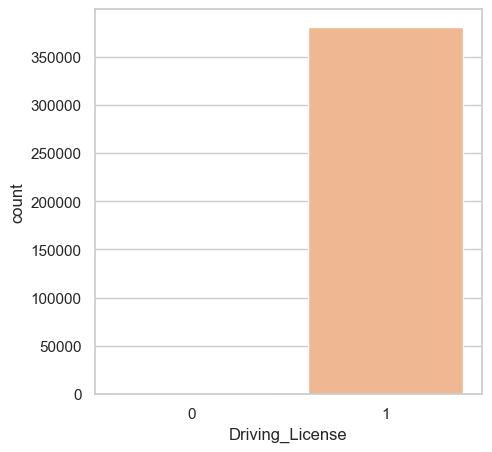

In [11]:
plt.figure(figsize=(5,5))
sns.countplot(data=train_df, x='Driving_License');
train_df.Driving_License.value_counts()

* The vast majority has driving license.


1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64

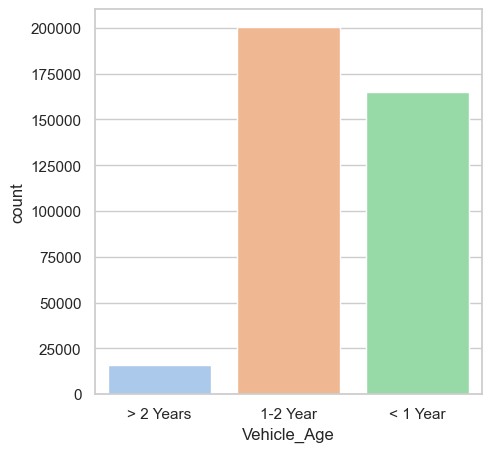

In [12]:
plt.figure(figsize=(5,5))
sns.countplot(data=train_df, x='Vehicle_Age');
train_df.Vehicle_Age.value_counts()

* The vast majority 1-2 year of vehicle age or less than 1 year.

Yes    192413
No     188696
Name: Vehicle_Damage, dtype: int64

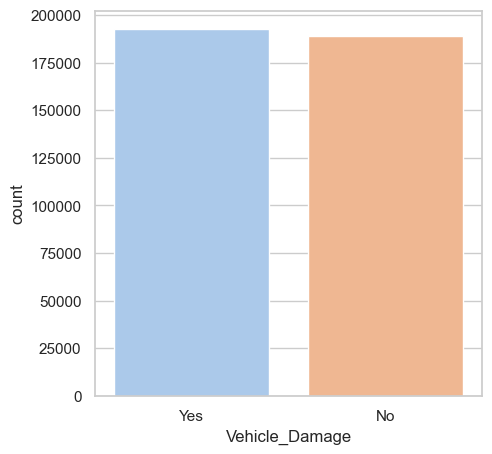

In [13]:
plt.figure(figsize=(5,5))
sns.countplot(data=train_df, x='Vehicle_Damage');
train_df.Vehicle_Damage.value_counts()

* Vahicle damage data are balanced (almost same)

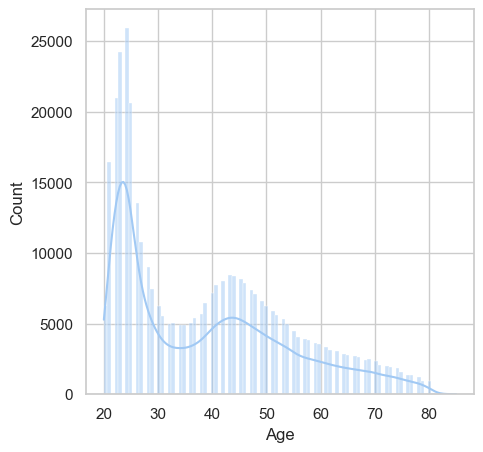

In [14]:
plt.figure(figsize=(5,5))
sns.histplot(data=train_df, x='Age', kde=True);

* We have more data in the 20-30 and 40-50 age range.

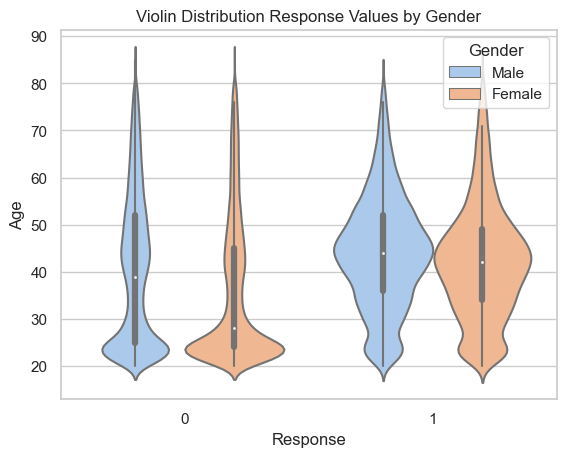

In [15]:
ax = sns.violinplot(data=train_df,x='Response', y='Age', hue='Gender')
ax.set_title('Violin Distribution Response Values by Gender');

* 20-30 age generally reject the insurance.
* 40-50 age generally accept the insurance.

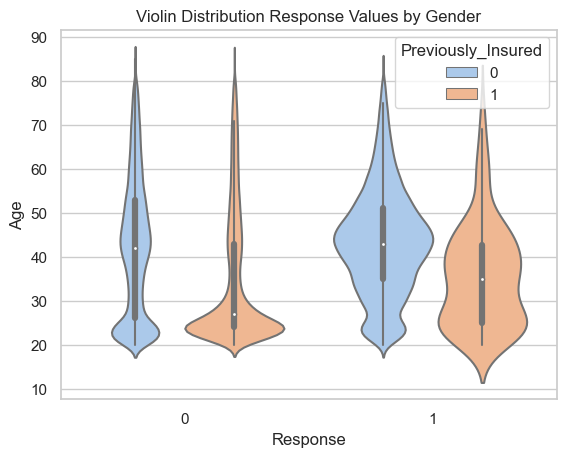

In [16]:
ax = sns.violinplot(data=train_df,x='Response', y='Age', hue='Previously_Insured')
ax.set_title('Violin Distribution Response Values by Gender');

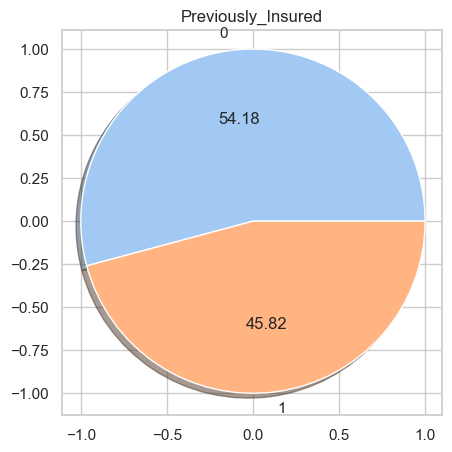

0    206481
1    174628
Name: Previously_Insured, dtype: int64

In [17]:
plt.figure(figsize=(5,5))
plt.pie(train_df['Previously_Insured'].value_counts(), labels=train_df['Previously_Insured'].value_counts().index,autopct='%.2f', shadow=True, frame=True )
plt.title('Previously_Insured')
plt.show();
train_df['Previously_Insured'].value_counts()

* Those who had previously insured generally response positive.
* Those who have previously insured and response negative are generally between the ages of 20-30.
* Those who do not have insurance before and return positive are generally between the ages of 40-50.


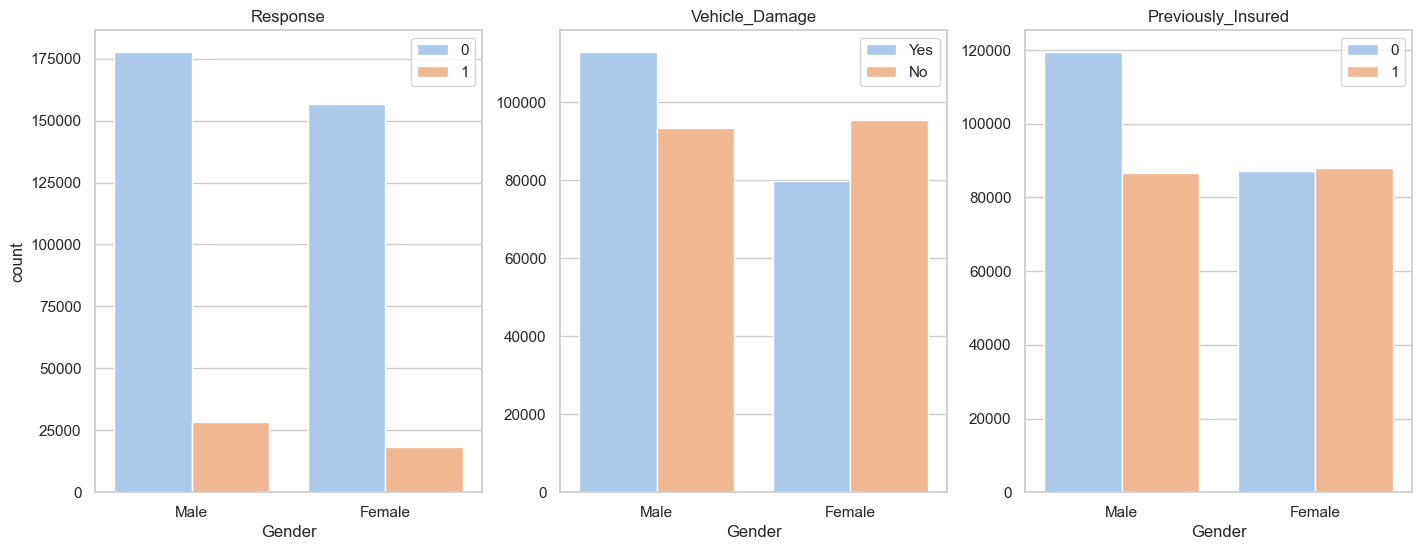

In [18]:
plt.figure(figsize=(17,6))

plt.subplot(1,3,1)
plt.title('Response')
plt.ylabel('Count')
plt.xlabel('Gender')
sns.countplot(x='Gender',hue='Response',data=train_df);
plt.legend()

plt.subplot(1,3,2)
plt.title('Vehicle_Damage')
plt.xlabel('Gender')
g1=sns.countplot(x='Gender',hue='Vehicle_Damage',data=train_df);
g1.set(ylabel=None)
plt.legend()

plt.subplot(1,3,3)
plt.title('Previously_Insured')
plt.xlabel('Gender')
g1=sns.countplot(x='Gender',hue='Previously_Insured',data=train_df);
plt.legend()
g1.set(ylabel=None)

plt.show();

* More people in men approached insurance positively
* The number of women who have previously been in an accident is less.
* More people in men previously insudered.

In [20]:
test_df.head().T

,0,1,2,3,4
id,381110,381111,381112,381113,381114
Gender,Male,Male,Male,Male,Male
Age,25,40,47,24,27
Driving_License,1,1,1,1,1
Region_Code,11.0,28.0,28.0,27.0,28.0
Previously_Insured,1,0,0,1,1
Vehicle_Age,< 1 Year,1-2 Year,1-2 Year,< 1 Year,< 1 Year
Vehicle_Damage,No,Yes,Yes,Yes,No
Annual_Premium,35786.0,33762.0,40050.0,37356.0,59097.0
Policy_Sales_Channel,152.0,7.0,124.0,152.0,152.0


In [21]:
train_df.head().T

,0,1,2,3,4
id,1,2,3,4,5
Gender,Male,Male,Male,Male,Female
Age,44,76,47,21,29
Driving_License,1,1,1,1,1
Region_Code,28.0,3.0,28.0,11.0,41.0
Previously_Insured,0,0,0,1,1
Vehicle_Age,> 2 Years,1-2 Year,> 2 Years,< 1 Year,< 1 Year
Vehicle_Damage,Yes,No,Yes,No,No
Annual_Premium,40454.0,33536.0,38294.0,28619.0,27496.0
Policy_Sales_Channel,26.0,26.0,26.0,152.0,152.0


In [22]:
# Transformation categorical value into numeric value
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
cat = ['Gender', 'Vehicle_Age', 'Vehicle_Damage']
for cat_val in cat:
    train_df[cat_val] = le.fit_transform(train_df[cat_val])
    test_df[cat_val] = le.fit_transform(test_df[cat_val])

In [23]:
train_df.head().T

,0,1,2,3,4
id,1.0,2.0,3.0,4.0,5.0
Gender,1.0,1.0,1.0,1.0,0.0
Age,44.0,76.0,47.0,21.0,29.0
Driving_License,1.0,1.0,1.0,1.0,1.0
Region_Code,28.0,3.0,28.0,11.0,41.0
Previously_Insured,0.0,0.0,0.0,1.0,1.0
Vehicle_Age,2.0,0.0,2.0,1.0,1.0
Vehicle_Damage,1.0,0.0,1.0,0.0,0.0
Annual_Premium,40454.0,33536.0,38294.0,28619.0,27496.0
Policy_Sales_Channel,26.0,26.0,26.0,152.0,152.0


**NOTE:** 
* Gender 1: Male, 0:Female
* Vehicle_Age 0: 1-2 Year, 1: < 1 Year ,2: > 2 Years
* Vehicle_Damage 0: No, 1:Yes           

In [27]:
test_df.head().T

,0,1,2,3,4
id,381110.0,381111.0,381112.0,381113.0,381114.0
Gender,1.0,1.0,1.0,1.0,1.0
Age,25.0,40.0,47.0,24.0,27.0
Driving_License,1.0,1.0,1.0,1.0,1.0
Region_Code,11.0,28.0,28.0,27.0,28.0
Previously_Insured,1.0,0.0,0.0,1.0,1.0
Vehicle_Age,1.0,0.0,0.0,1.0,1.0
Vehicle_Damage,0.0,1.0,1.0,1.0,0.0
Annual_Premium,35786.0,33762.0,40050.0,37356.0,59097.0
Policy_Sales_Channel,152.0,7.0,124.0,152.0,152.0


Our values of dataset are numeric values 

In [28]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  int32  
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  int32  
 7   Vehicle_Damage        381109 non-null  int32  
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int32(3), int64(6)
memory usage: 30.5 MB


In [45]:
train_df = train_df.astype(int)
test_df = test_df.astype(int)

Converting all data type to integer can increase the accuracy of the model


In [30]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   id                    381109 non-null  int32
 1   Gender                381109 non-null  int32
 2   Age                   381109 non-null  int32
 3   Driving_License       381109 non-null  int32
 4   Region_Code           381109 non-null  int32
 5   Previously_Insured    381109 non-null  int32
 6   Vehicle_Age           381109 non-null  int32
 7   Vehicle_Damage        381109 non-null  int32
 8   Annual_Premium        381109 non-null  int32
 9   Policy_Sales_Channel  381109 non-null  int32
 10  Vintage               381109 non-null  int32
 11  Response              381109 non-null  int32
dtypes: int32(12)
memory usage: 17.4 MB


In [36]:
# Check the unique value of numeric columns
for col in train_df.columns:
    if train_df[col].dtypes == 'int32':
        print(col, train_df[col].unique())

id [     1      2      3 ... 381107 381108 381109]
Gender [1 0]
Age [44 76 47 21 29 24 23 56 32 41 71 37 25 42 60 65 49 34 51 26 57 79 48 45
 72 30 54 27 38 22 78 20 39 62 58 59 63 50 67 77 28 69 52 31 33 43 36 53
 70 46 55 40 61 75 64 35 66 68 74 73 84 83 81 80 82 85]
Driving_License [1 0]
Region_Code [28  3 11 41 33  6 35 50 15 45  8 36 30 26 16 47 48 19 39 23 37  5 17  2
  7 29 46 27 25 13 18 20 49 22 44  0  9 31 12 34 21 10 14 38 24 40 43 32
  4 51 42  1 52]
Previously_Insured [0 1]
Vehicle_Age [2 0 1]
Vehicle_Damage [1 0]
Annual_Premium [ 40454  33536  38294 ...  20706 101664  69845]
Policy_Sales_Channel [ 26 152 160 124  14  13  30 156 163 157 122  19  22  15 154  16  52 155
  11 151 125  25  61   1  86  31 150  23  60  21 121   3 139  12  29  55
   7  47 127 153  78 158  89  32   8  10 120  65   4  42  83 136  24  18
  56  48 106  54  93 116  91  45   9 145 147  44 109  37 140 107 128 131
 114 118 159 119 105 135  62 138 129  88  92 111 113  73  36  28  35  59
  53 148 133 108  

Datasets are ready to modelling. 
Firstly, talk about dataset.

train_df include the training data and validation data. We fitting model and evaluating model with train_df. 

test_df include only our features and we just predict label. We use to train_df fitting model and calculate score and other metrics.

C:\Users\Dell\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:5215: RuntimeWarning: overflow encountered in longlong_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


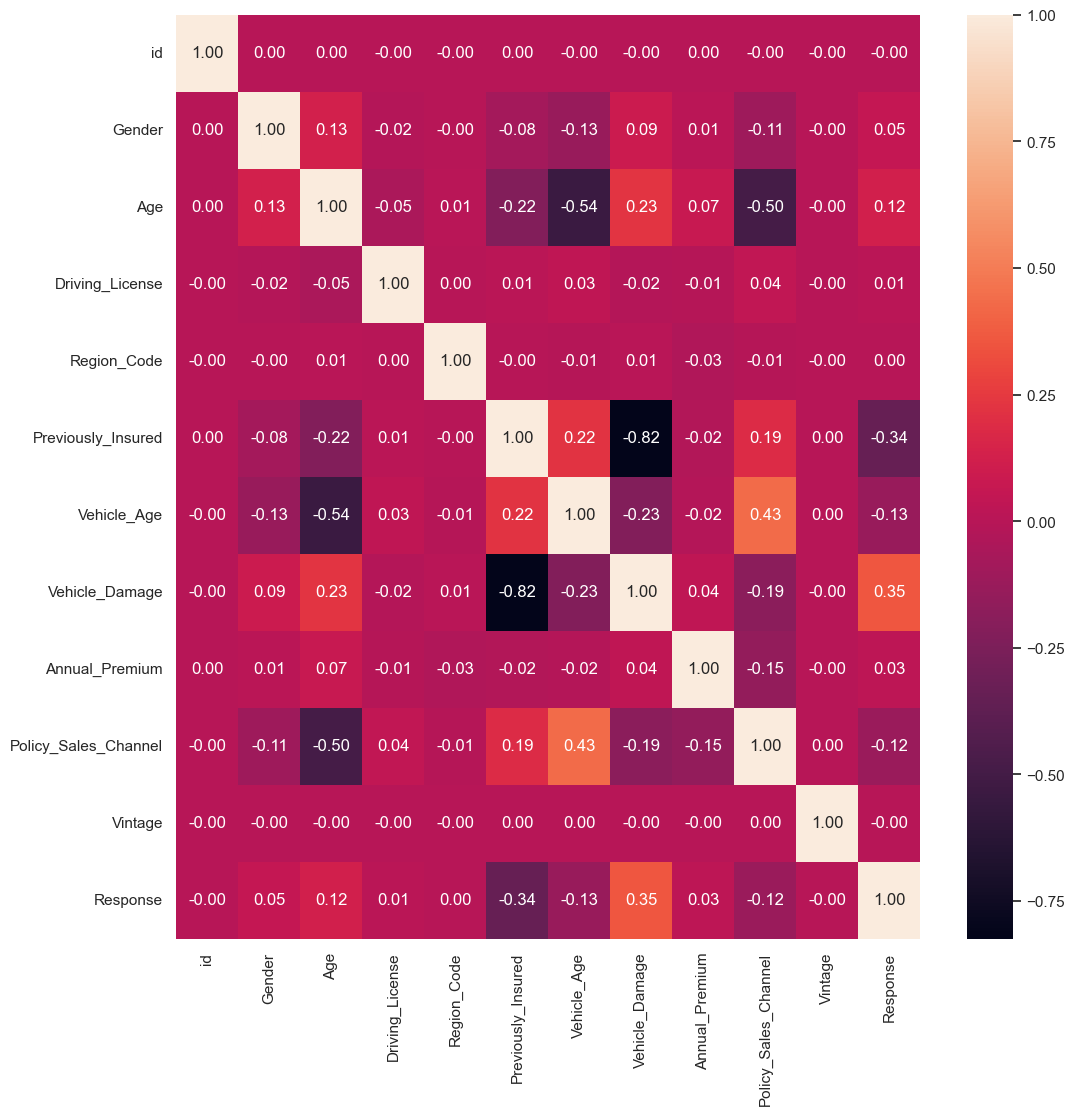

In [40]:
# We can create correlation matrix, all values are numeric
correlation = train_df.corr(method='kendall')
fig = plt.figure(figsize=(12,12))
ax = sns.heatmap(correlation, annot=True, fmt='.2f')

Id, vintage and Region code datas are subjective value. This is not important to model (for response value).
We can reach this info from correlation matrix.

In [41]:
train_df.drop('id', axis=1, inplace=True)
train_df.drop('Region_Code', axis=1, inplace=True)
train_df.drop('Vintage', axis=1, inplace=True)
test_df.drop('id', axis=1, inplace=True)
test_df.drop('Region_Code', axis=1, inplace=True)
test_df.drop('Vintage', axis=1, inplace=True)

In [42]:
train_df.head().T

,0,1,2,3,4
Gender,1,1,1,1,0
Age,44,76,47,21,29
Driving_License,1,1,1,1,1
Previously_Insured,0,0,0,1,1
Vehicle_Age,2,0,2,1,1
Vehicle_Damage,1,0,1,0,0
Annual_Premium,40454,33536,38294,28619,27496
Policy_Sales_Channel,26,26,26,152,152
Response,1,0,1,0,0


In [43]:
test_df.head().T

,0,1,2,3,4
Gender,1.0,1.0,1.0,1.0,1.0
Age,25.0,40.0,47.0,24.0,27.0
Driving_License,1.0,1.0,1.0,1.0,1.0
Previously_Insured,1.0,0.0,0.0,1.0,1.0
Vehicle_Age,1.0,0.0,0.0,1.0,1.0
Vehicle_Damage,0.0,1.0,1.0,1.0,0.0
Annual_Premium,35786.0,33762.0,40050.0,37356.0,59097.0
Policy_Sales_Channel,152.0,7.0,124.0,152.0,152.0


Our datasets are ready for modelling. 

The problem is supervised and classification problem. We can check sklearn ML module map and choosing the which have high score module.

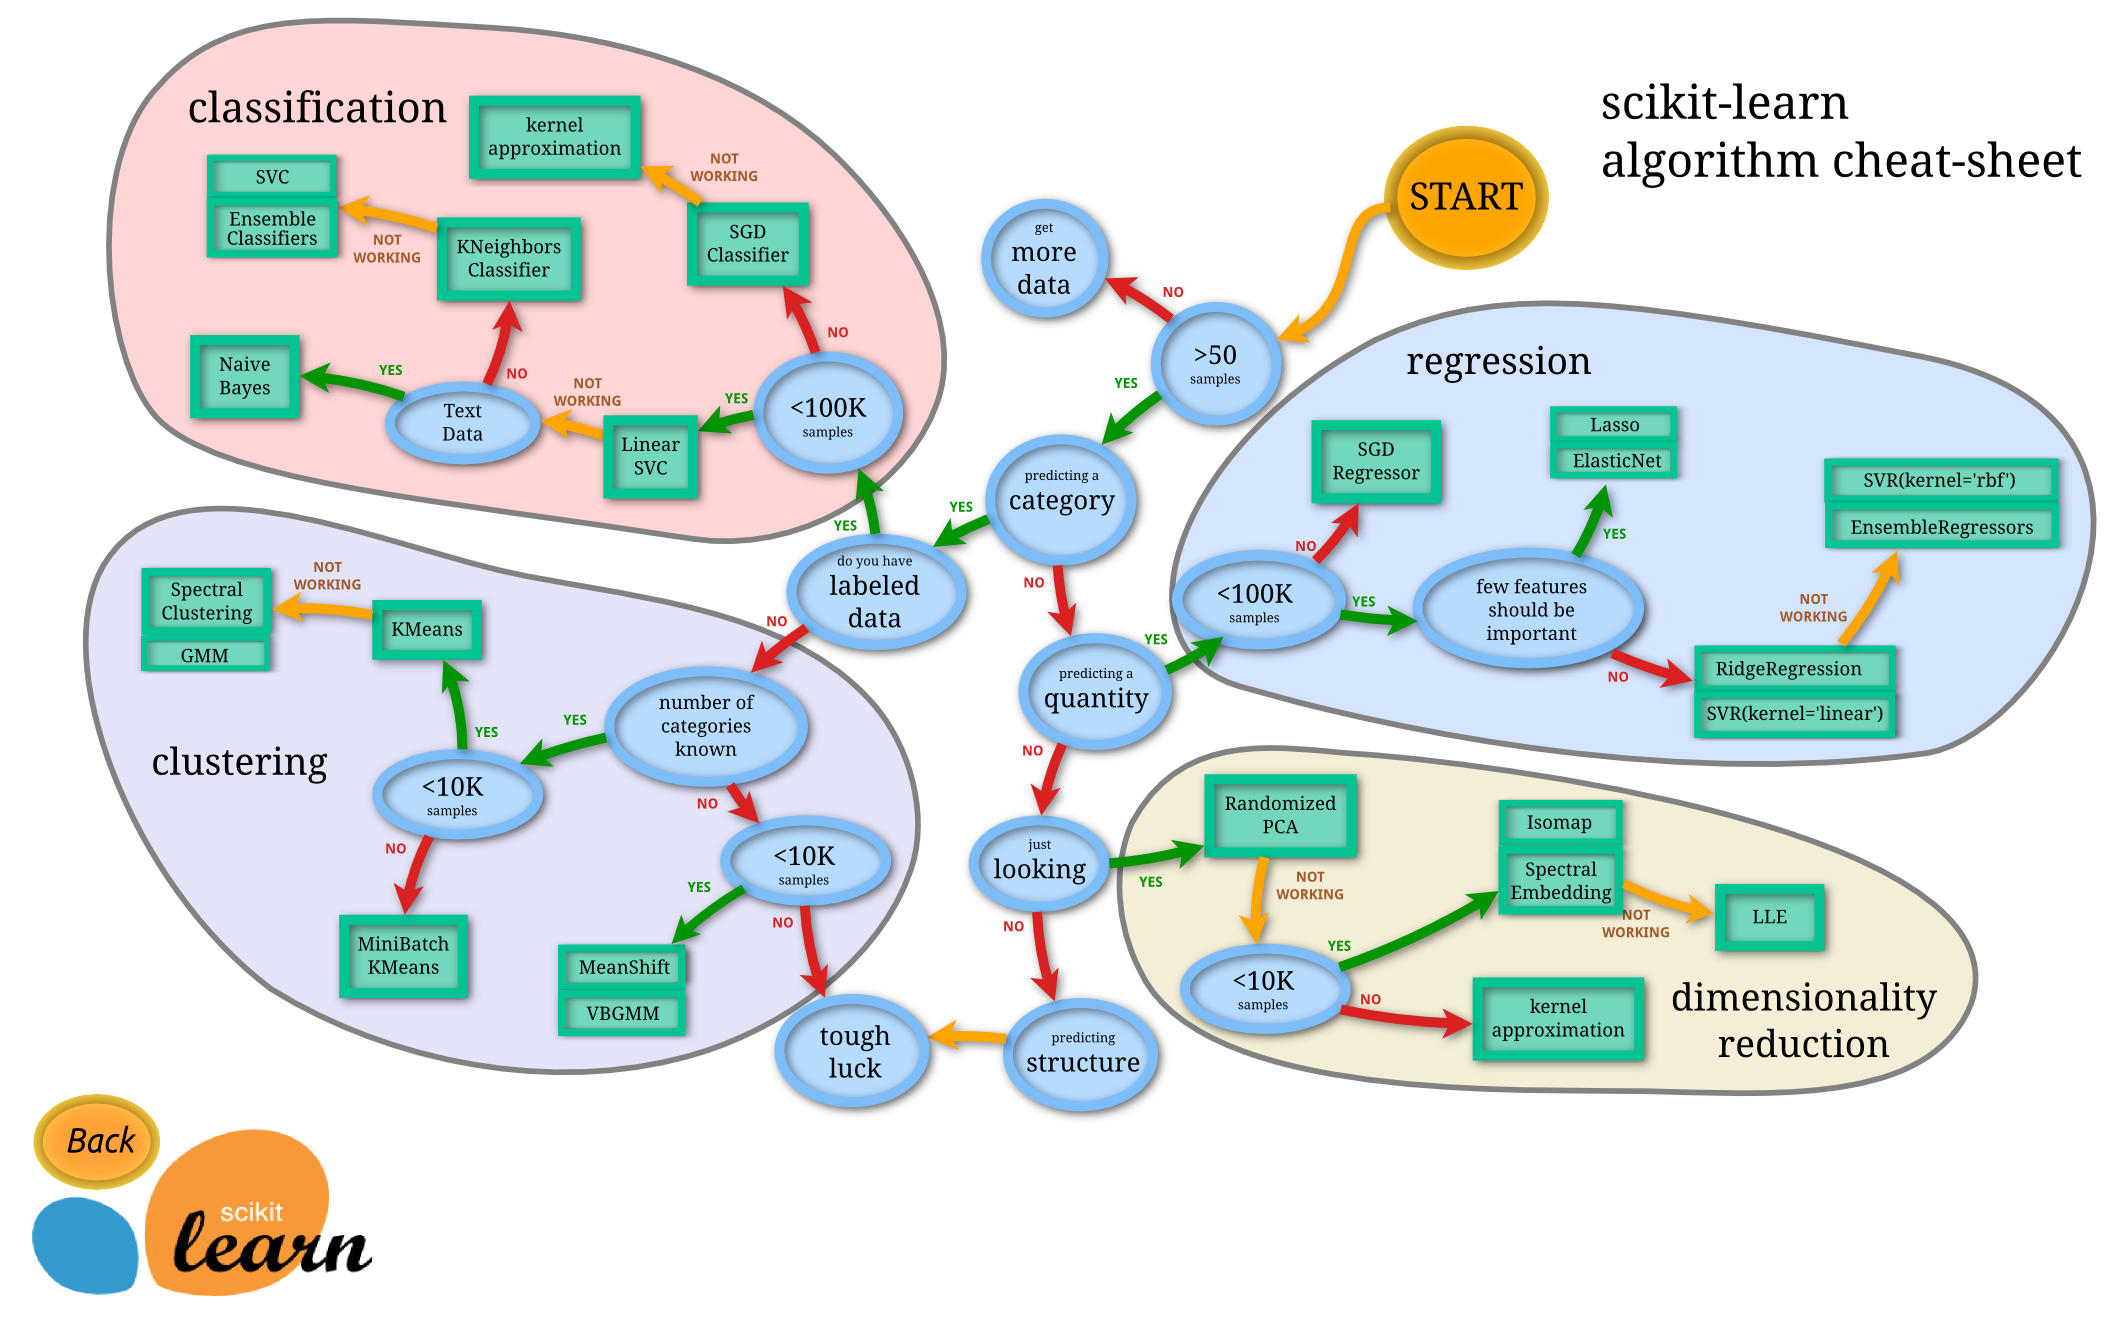

In [46]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127037 entries, 0 to 127036
Data columns (total 8 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Gender                127037 non-null  int32
 1   Age                   127037 non-null  int32
 2   Driving_License       127037 non-null  int32
 3   Previously_Insured    127037 non-null  int32
 4   Vehicle_Age           127037 non-null  int32
 5   Vehicle_Damage        127037 non-null  int32
 6   Annual_Premium        127037 non-null  int32
 7   Policy_Sales_Channel  127037 non-null  int32
dtypes: int32(8)
memory usage: 3.9 MB


* There are more than 50 samples.
* Predicting a category.
* We have labeled data.
* There are more than 100k samples. (245725, 9)
* We can try to 'SGDClassifier', 'RandomForestClassfier'

In [47]:
# Firstly split the data into x & y
x = train_df.drop('Response', axis=1)
y = train_df['Response']
x.shape, y.shape

((381109, 8), (381109,))

In [48]:
# Split the data into train and test
from sklearn.model_selection import train_test_split
# Random seed
np.random.seed(42)
x_train, x_val, y_train, y_val = train_test_split(x,
                                                  y,
                                                  test_size=0.2)
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((304887, 8), (76222, 8), (304887,), (76222,))

In [49]:
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier

In [55]:
models = {'SGDClassifier': SGDClassifier(),
          'RandomForestClassifier':RandomForestClassifier()}
def fit_and_score(models, x_train, x_val, y_train, y_val):
    '''
    This function will fitting the model and dataset and
    calculate the model score
    '''
    np.random.seed(42)
    model_train_score={}
    model_score={}
    for name, model in models.items():
        model.fit(x_train,y_train)
        model_train_score[name] = model.score(x_train, y_train) * 100
        model_score[name] = model.score(x_val, y_val)
    return 'Validation scores', model_score, 'Training scores', model_train_score

In [56]:
model_score = fit_and_score(models=models,
                            x_train=x_train,
                            x_val=x_val,
                            y_train=y_train,
                            y_val=y_val)
model_score

('Validation scores',
 {'SGDClassifier': 0.8701424785495001,
  'RandomForestClassifier': 0.8428012909658629},
 'Training scores',
 {'SGDClassifier': 87.2808614339083,
  'RandomForestClassifier': 97.84313532554684})

Training score of RandomForestClassifier higher than SGDClassifier. We choose the RandomForestClassifier model and continue. 

Now, we can fitting again RandomForestClassifier module, tuning hyperparameters and evaluating metric scores.

* Accuracy
* F1_score
* Precision
* ROC Curve

Dataset is big dataset. we will make hyperparameter tuning with some of them and apply it to the general.


In [58]:
NUM_DATA = 10000 
a = train_df.drop(['Response'], axis=1)
b = train_df['Response']
a_train, a_val, b_train, b_val = train_test_split(a[:NUM_DATA],
                                                  b[:NUM_DATA],
                                                  test_size = 0.2,
                                                  random_state = 42)
a_train.shape, a_val.shape, b_train.shape, b_val.shape

((8000, 8), (2000, 8), (8000,), (2000,))

In [59]:
model_try = RandomForestClassifier()
model_try.fit(a_train, b_train)
model_try.score(a_val,b_val)

0.8515

In [60]:
from sklearn.model_selection import GridSearchCV
# Using GridSearchCV tuning the hyperparameters
# State the random seed
np.random.seed(42)
param_grid = {
    'bootstrap': [True],
    'max_depth': [None],
    'max_features': ["auto"],
    'min_samples_leaf': [1,3,5],
    'min_samples_split': [2, 8, 12],
    'n_estimators': [100, 200],
    'max_samples':[None]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = None, n_jobs = None)
grid_search.fit(a_train, b_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'max_depth': [None],
                         'max_features': ['auto'], 'max_samples': [None],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 8, 12],
                         'n_estimators': [100, 200]})

In [62]:
grid_search.score(a_val, b_val)

0.8745

In [61]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': None,
 'max_features': 'auto',
 'max_samples': None,
 'min_samples_leaf': 5,
 'min_samples_split': 8,
 'n_estimators': 200}

We will fit the model with best hyperparameters and evaluating score.

In [64]:
model_full = RandomForestClassifier(bootstrap= True,
  max_depth= None,
  max_features= 'auto',
  max_samples= None,
  min_samples_leaf= 5,
  min_samples_split= 8,
  n_estimators= 200)
# Fitting model
model_full.fit(x_train, y_train)
# Calculate model score
print('***Model score...***')
model_full.score(x_val, y_val)

***Model score...***


0.8732649366324683

Score is increased from 0.8428012909658629 to 0.8732649366324683 with tuning hyperparameters.

In [70]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve

In [71]:
y_pred = model_full.predict(x_val)
y_pred.shape

(76222,)

In [77]:
# Accuracy Score
acc_sc = accuracy_score(y_val, y_pred)
acc_sc

0.8732649366324683

**NOTE:** Accuracy score and `model_score` are same things.

In [73]:
# Confusion matrix
confusion_matrix(y_val, y_pred)

array([[66105,   594],
       [ 9066,   457]], dtype=int64)

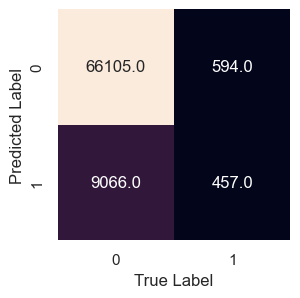

In [74]:
# Visualization confusion matrix
def plot_conf_mat(y_test, y_preds):
    """
    For confusion matrix visualization using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_pred),
                     annot=True,
                     fmt='.1f',
                     cbar=False)
    plt.xlabel('True Label')
    plt.ylabel('Predicted Label')
plot_conf_mat(y_val, y_pred)

Precision is a measure of how many of the positive predictions made are correct (true positives).

In [78]:
# Precision score
pre_sc = precision_score(y_val, y_pred)
pre_sc

0.43482397716460514

In [81]:
# Recall score
rc_sc = recall_score(y_val, y_pred)
rc_sc

0.0479890790717211

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


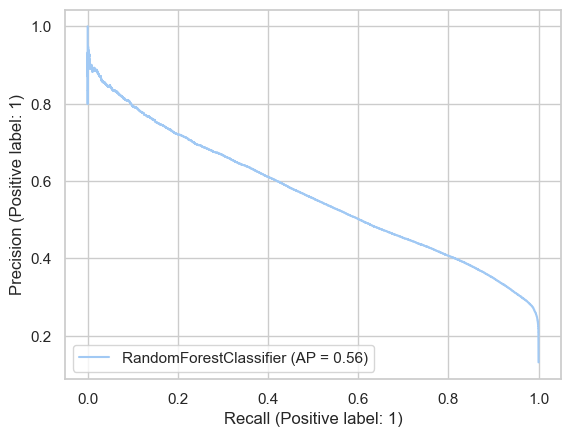

In [82]:
plot_precision_recall_curve(model_full, x, y);

F1-Score is a measure combining both precision and recall. It is generally described as the harmonic mean of the two.

In [83]:
# f1 score
f1_sc = f1_score(y_val, y_pred)
f1_sc

0.08643843389445811

The ROC AUC score tells us how efficient the model is. The higher the AUC, the better the model's performance at distinguishing between the positive and negative classes.

In [84]:
# ROC_AUC score
roc = roc_auc_score(y_val, y_pred)
roc

0.5195416991634411

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


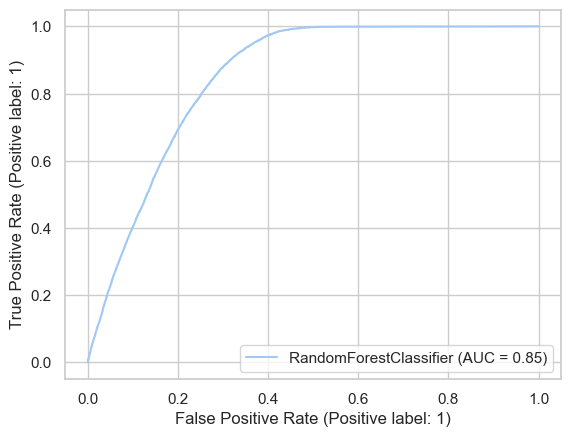

In [85]:
plot_roc_curve(model_full, x_val, y_val)  

In [86]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93     66699
           1       0.43      0.05      0.09      9523

    accuracy                           0.87     76222
   macro avg       0.66      0.52      0.51     76222
weighted avg       0.82      0.87      0.83     76222



The metric value of all labels can be displayed in the classification report.


Finally, we can predict Is_Lead value of test_df. Model is ready.

In [88]:
test_df.head().T

,0,1,2,3,4
Gender,1,1,1,1,1
Age,25,40,47,24,27
Driving_License,1,1,1,1,1
Previously_Insured,1,0,0,1,1
Vehicle_Age,1,0,0,1,1
Vehicle_Damage,0,1,1,1,0
Annual_Premium,35786,33762,40050,37356,59097
Policy_Sales_Channel,152,7,124,152,152


In [89]:
Response = model_full.predict(test_df)
Response

array([0, 0, 0, ..., 0, 0, 0])

In [90]:
test_df['Predicted_Response'] = Response

In [91]:
test_df.head().T

,0,1,2,3,4
Gender,1,1,1,1,1
Age,25,40,47,24,27
Driving_License,1,1,1,1,1
Previously_Insured,1,0,0,1,1
Vehicle_Age,1,0,0,1,1
Vehicle_Damage,0,1,1,1,0
Annual_Premium,35786,33762,40050,37356,59097
Policy_Sales_Channel,152,7,124,152,152
Predicted_Response,0,0,0,0,0


Response is the result of our predictions with the model we have created.